In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('diabetes2.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


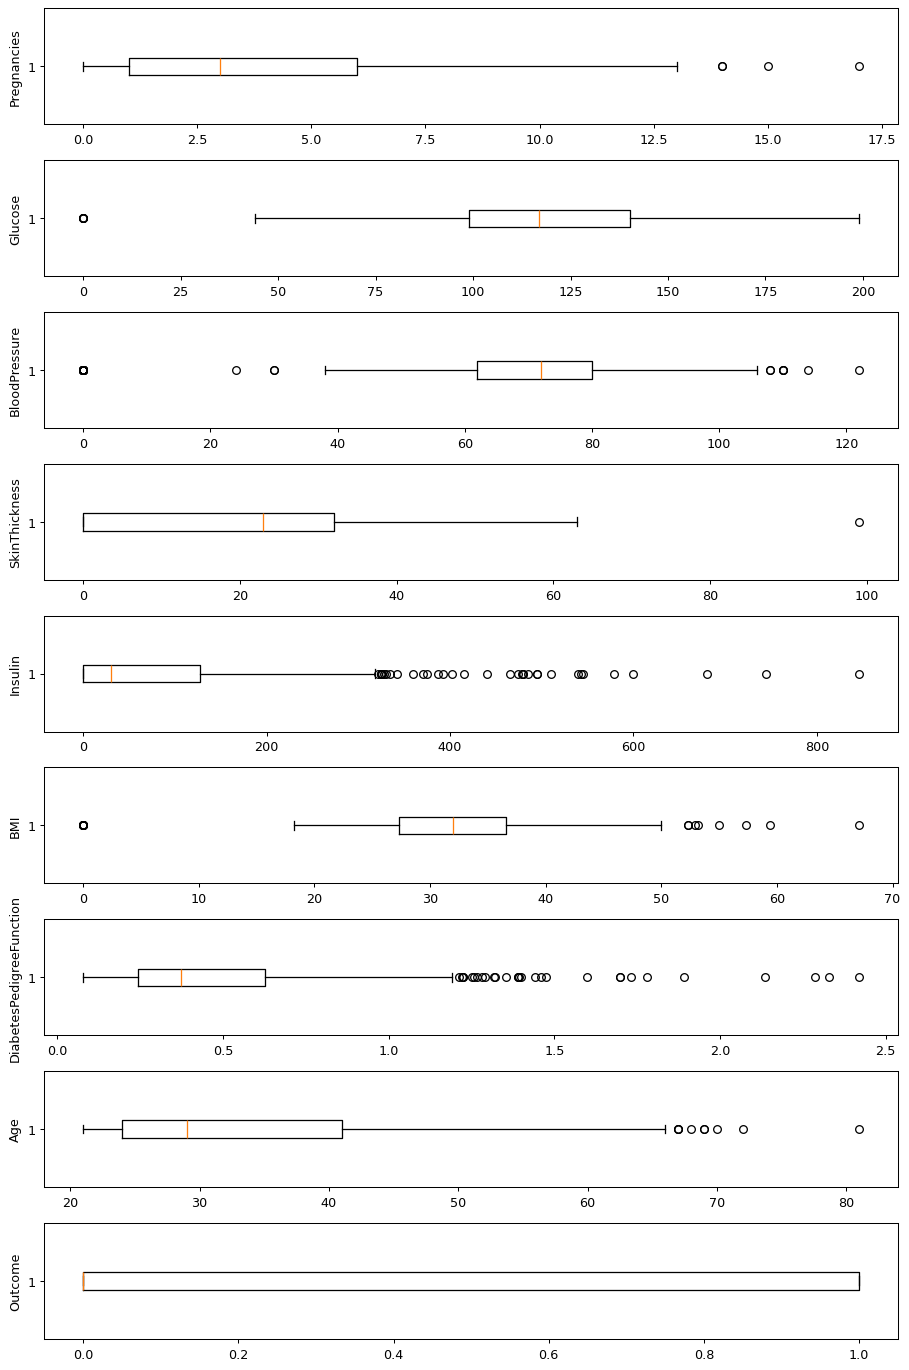

In [8]:
fig ,axi=plt.subplots(len(df.columns),1,figsize=(10,15),dpi=92)
for i,col in enumerate(df.columns):
    axi[i].boxplot(df[col],vert=False)
    axi[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [9]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)

df[cols] = df[cols].fillna(df[cols].median())


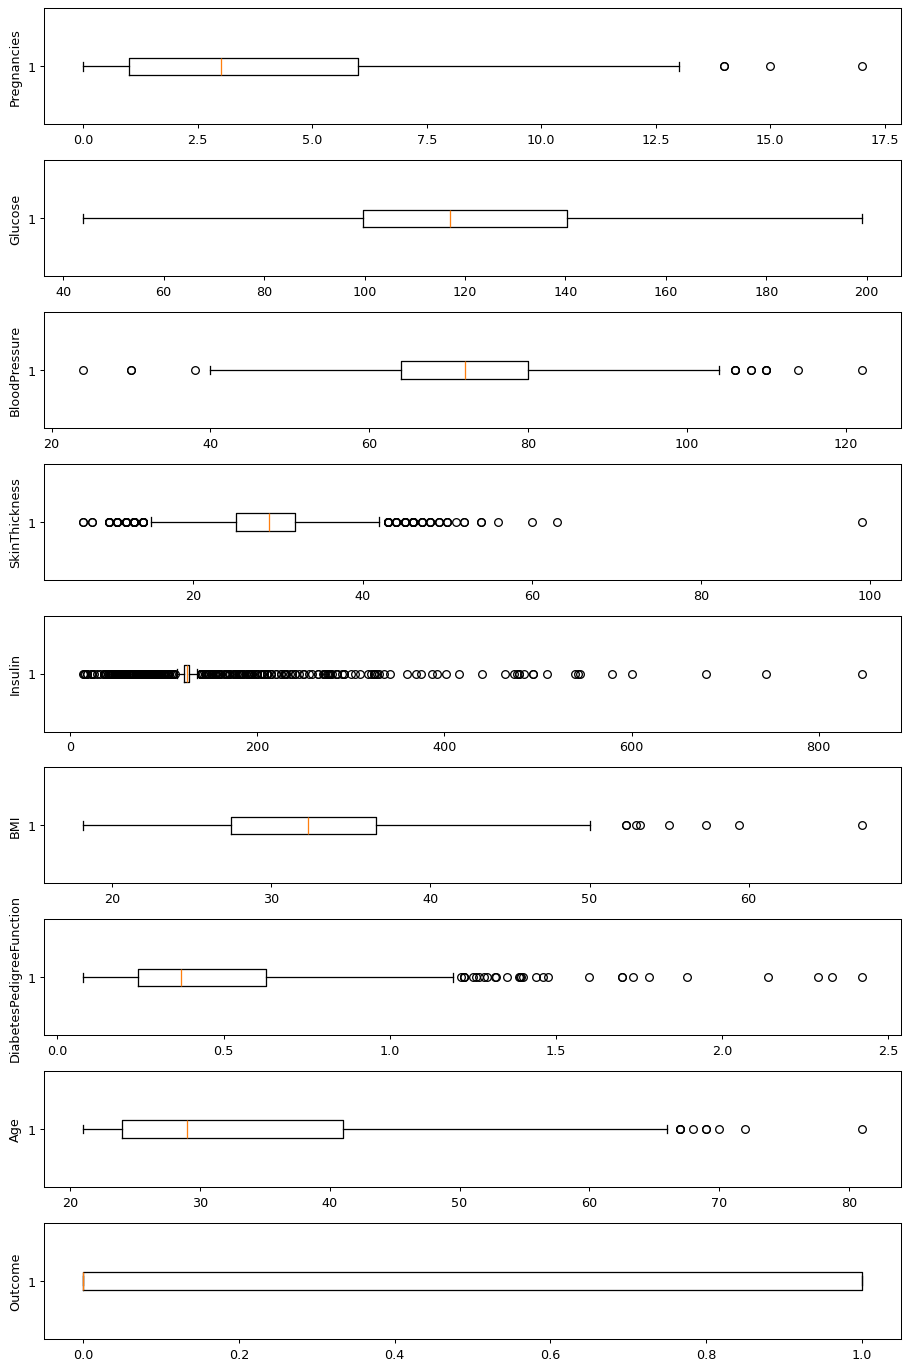

In [10]:
fig ,axi=plt.subplots(len(df.columns),1,figsize=(10,15),dpi=92)
for i,col in enumerate(df.columns):
    axi[i].boxplot(df[col],vert=False)
    axi[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.25,random_state=42)

In [16]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((192, 8), (576, 8), (192,), (576,))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scale=StandardScaler()

In [20]:
x_train_scale=scale.fit_transform(X_train)
y_train_scale=scale.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
reg=LogisticRegression()

In [24]:
reg.fit(x_train_scale,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
y_pred=reg.predict(y_train_scale)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

0.7638888888888888
[[318  77]
 [ 59 122]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       395
           1       0.61      0.67      0.64       181

    accuracy                           0.76       576
   macro avg       0.73      0.74      0.73       576
weighted avg       0.77      0.76      0.77       576



In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag','saga'],         
    'l1_ratio': [0, 0.5, 1]       
}


In [ ]:
grid = GridSearchCV(
    estimator=reg,
    param_grid=params,
    scoring='recall',      # focus on detecting diabetics
    cv=5,#make the folds
    n_jobs=-1,
    verbose=2,#make you to see the progress
    refit=True#refits the best model
)


In [32]:
grid.fit(x_train_scale,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'l1_ratio': [0, 0.5, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [33]:
grid.best_params_

{'C': 0.01, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
rand=RandomizedSearchCV(reg,param_distributions=params,verbose=1,cv=5,scoring='accuracy',refit=True)

In [38]:
rand.fit(x_train_scale,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': [0.01, 0.1, ...], 'l1_ratio': [0, 0.5, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
rand.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0, 'C': 10}

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=grid.predict(y_train_scale)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

0.7534722222222222
[[303  68]
 [ 74 131]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       371
           1       0.66      0.64      0.65       205

    accuracy                           0.75       576
   macro avg       0.73      0.73      0.73       576
weighted avg       0.75      0.75      0.75       576



In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=rand.predict(y_train_scale)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
#high recall so randcv is better

0.7621527777777778
[[317  77]
 [ 60 122]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       394
           1       0.61      0.67      0.64       182

    accuracy                           0.76       576
   macro avg       0.73      0.74      0.73       576
weighted avg       0.77      0.76      0.76       576



In [45]:
#ROC- Reciver operating Characteristic
y_proba=rand.predict_proba(X_test)[:,1]

In [44]:
from sklearn.metrics import roc_curve,roc_auc_score

In [46]:
fpr,tpr,thresholds=roc_curve(Y_test,y_proba)
auc_score=roc_auc_score(Y_test,y_proba)

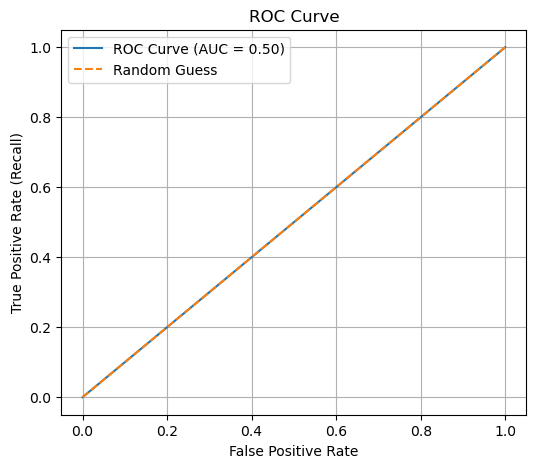

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


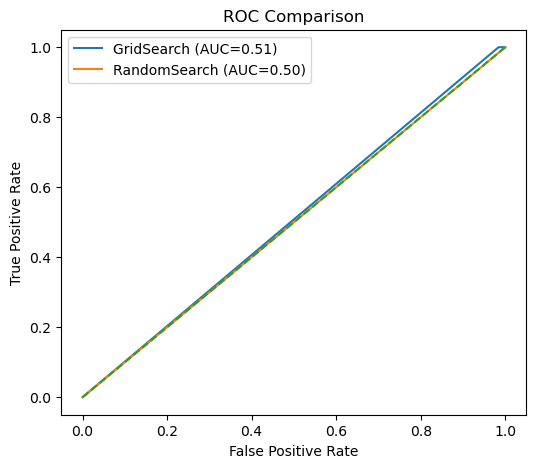

In [48]:
models = {
    'GridSearch': grid.best_estimator_,
    'RandomSearch': rand.best_estimator_
}

plt.figure(figsize=(6,5))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    auc = roc_auc_score(Y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend()
plt.show()


In [49]:
residual=Y_test-y_pred

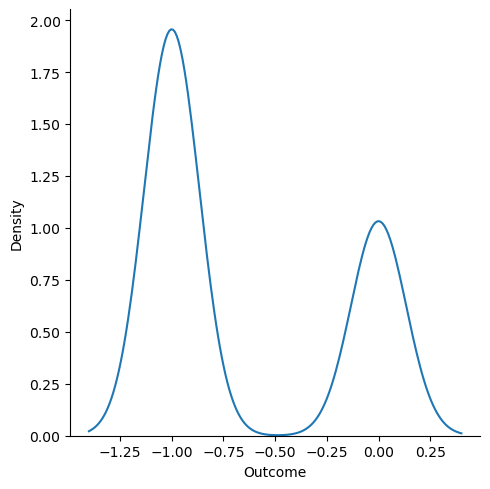

In [51]:
sns.displot(residual,kind='kde')